# New Wine with Old Bottle: Feature Selection for Ames Housing Price 

<font size="4">

"Data and characteristics determine the upper limit of machine learning, and models and algorithms just approach this
 upper limit."

## Introduction 

<font size="3">

In many (business) cases it is equally important to not only have an accurate, but also an interpretable model. Oftentimes, apart from wanting to know what our model’s house price prediction is, we also wonder why it is this high/low and which features are most important in determining the forecast. Another example might be predicting customer churn — it is very nice to have a model that is successfully predicting which customers are prone to churn, but identifying which variables are important can help us in early detection and maybe even improving the product/service!

Knowing feature importance indicated by machine learning models can benefit you in multiple ways, for example:
by getting a better understanding of the model’s logic you can not only verify it being correct but also work on improving the model by focusing only on the important variables
the above can be used for variable selection — you can remove x variables that are not that significant and have similar or better performance in much shorter training time
in some business cases it makes sense to sacrifice some accuracy for the sake of interpretability. For example, when a bank rejects a loan application, it must also have a reasoning behind the decision, which can also be presented to the customer

In this project, I will examine what characteristics help to boost the value of a house with feature selection tools. 

In [2]:
import os 
cwd = os.getcwd()
cwd

'/Users/lurui/Desktop/Course/Kaggle'

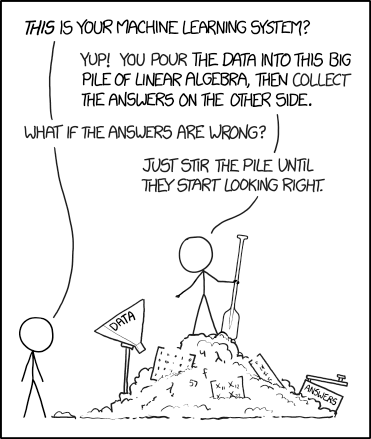

In [3]:
from IPython.display import Image
Image(filename='ML.png')

 <font size="3">
    Ames Housing Data Set : see http://jse.amstat.org/v19n3/decock.pdf (2006-2011) I was there !    

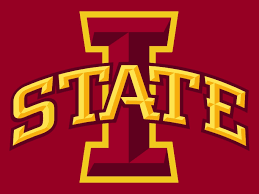

In [4]:
Image(filename='IASTATE.png')

 <font size="3">
Any data analysis should start with and always be guided by subject-matter knowledge.

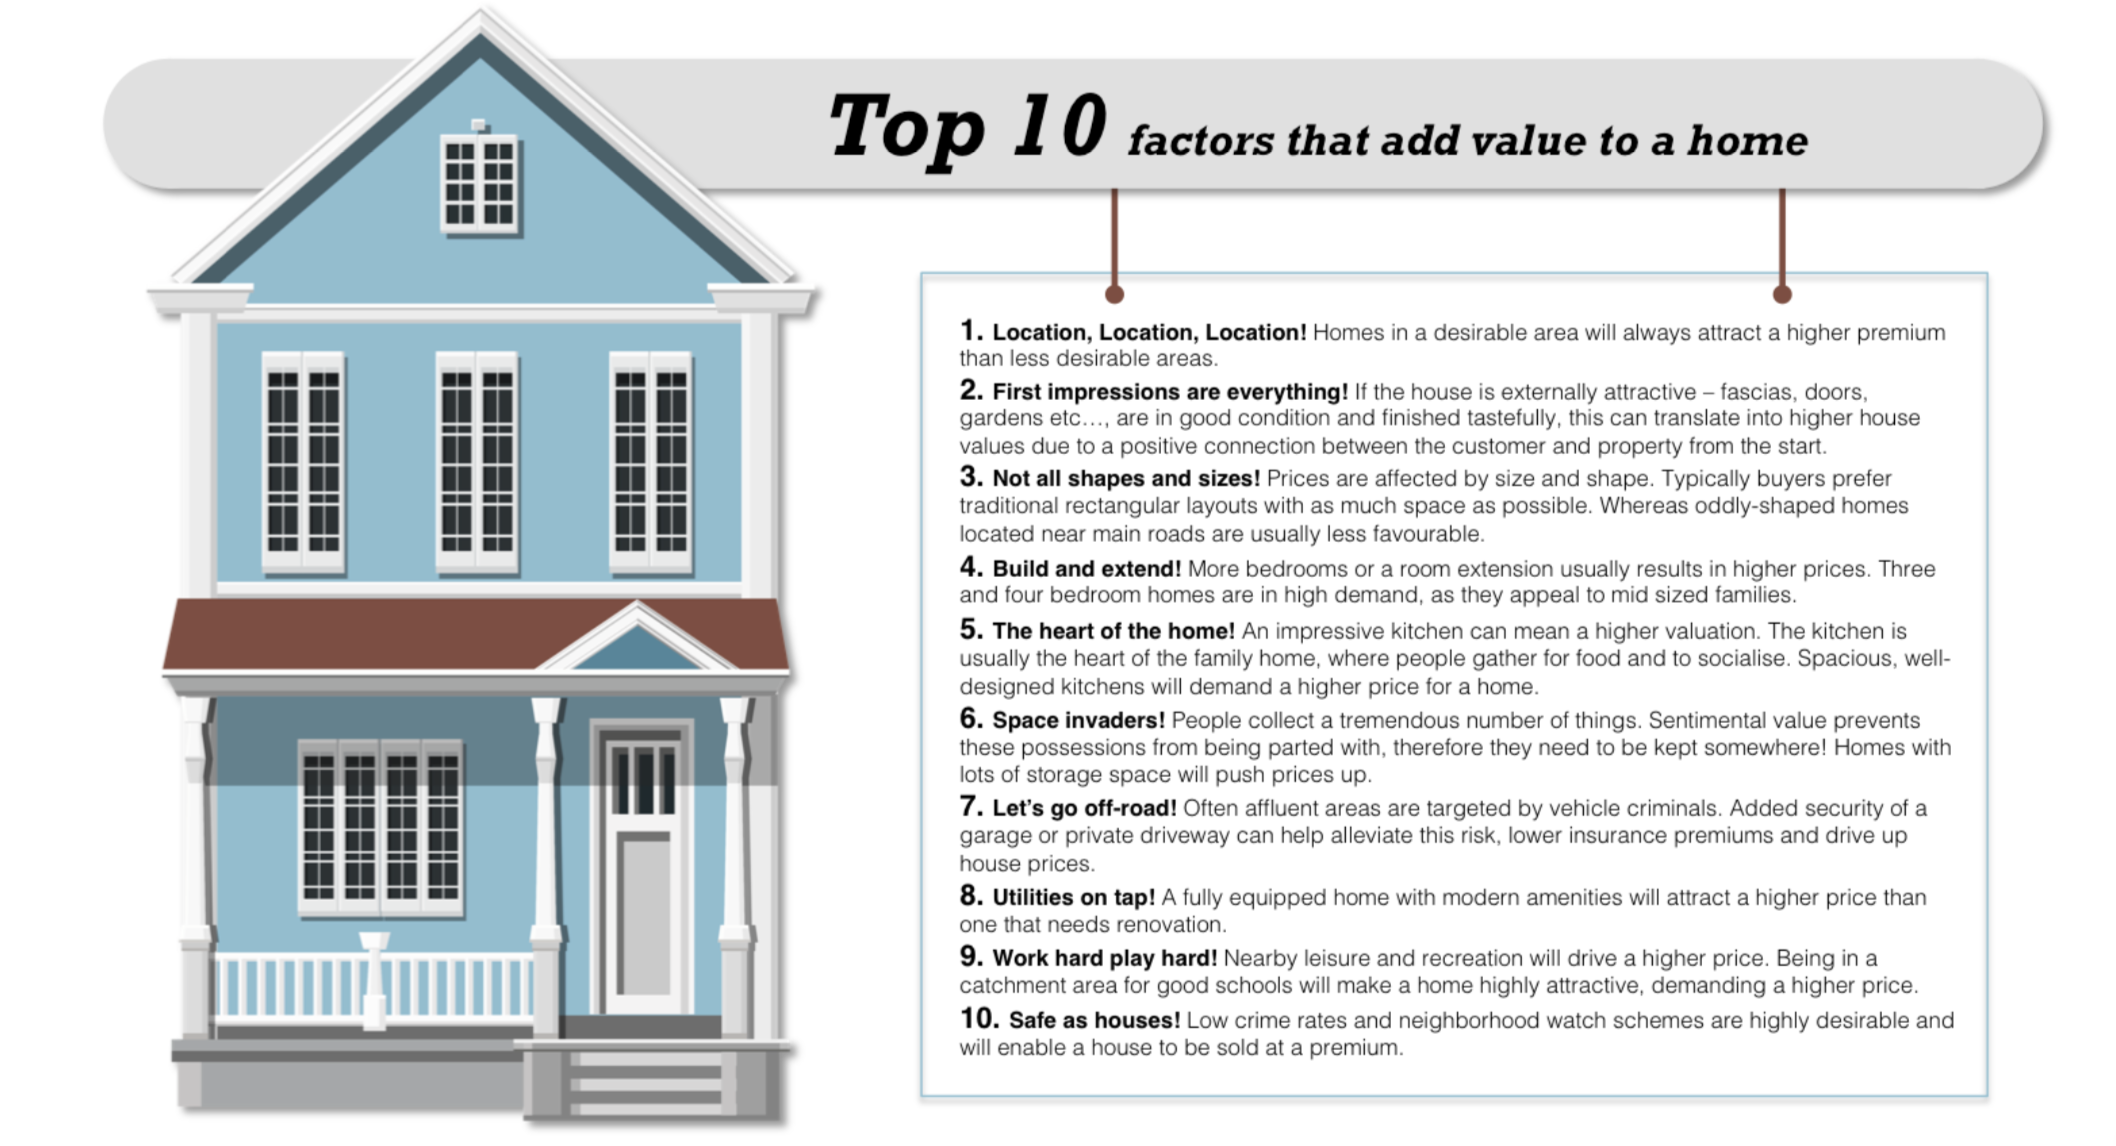

In [5]:
Image(filename='House_factors.png')

## Goal 

<font size="3">

(1) Which features are more important for Ames housing price prediction ?

(2) How to identify correct features selection methods ?

(3) How do use we feature selection correctly?

## Feature Selection Flow Chart 

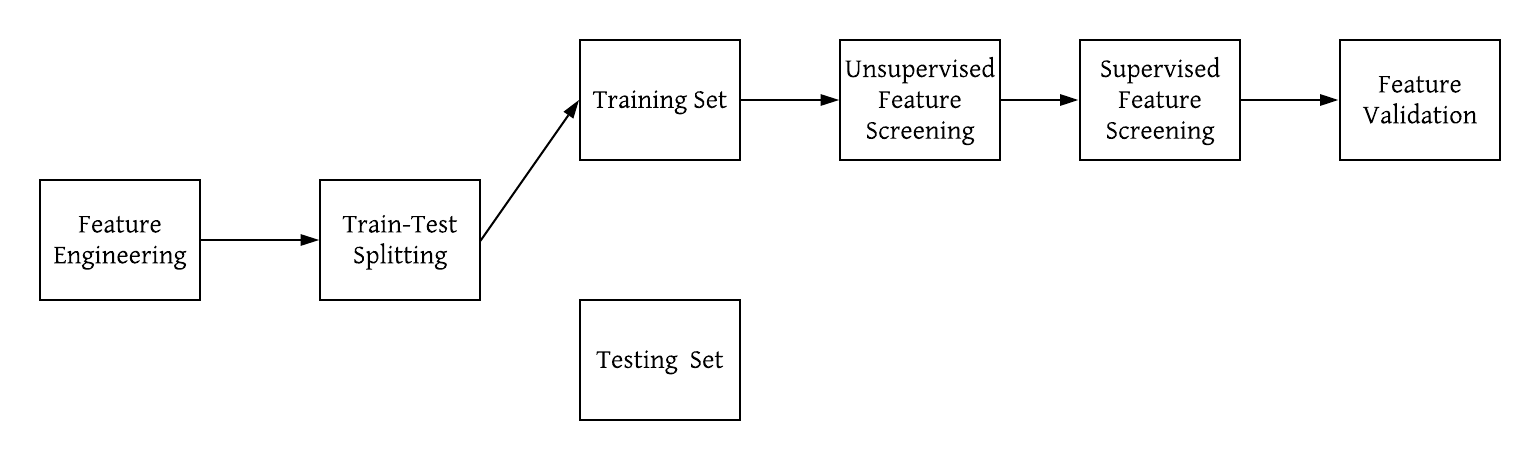

In [8]:
from IPython.display import Image
Image(filename='flow.png')

In [9]:
## Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
import os 
cwd = os.getcwd()
cwd

'/Users/lurui/Desktop/Course/Kaggle'

## I. Data Exploration 

In [11]:
df=pd.read_csv("train.csv",sep=",")

In [12]:
df.shape

(1460, 81)

In [13]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
print(df.shape)

(1460, 81)


In [15]:
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [16]:
## Id does not provide any useful information 
len(df.Id.unique()),df.shape

(1460, (1460, 81))

In [17]:
df=df.drop("Id",axis=1)

In [18]:
### Correct type of covariates
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['KitchenAbvGr'] =df['KitchenAbvGr'].astype(str)

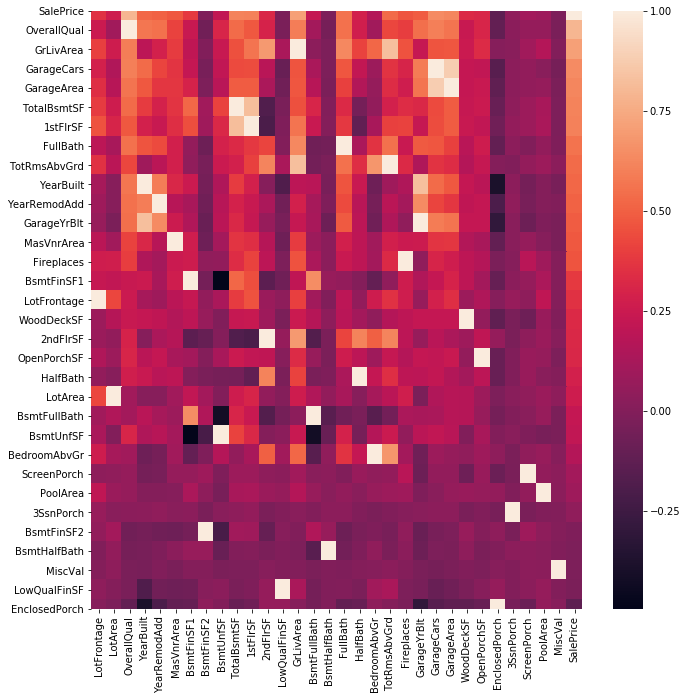

In [19]:
### Create correlation matrix for pre-liminary feature screening
corrmat = df.corr().sort_values(by='SalePrice',ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [20]:
print(abs(corrmat["SalePrice"]).sort_values(ascending=False).head(20))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64


<font size="3">
One thing need to note is  Pearson correlation only measures linear relationship between features. But, it's a good pre-screening tool.

In [21]:
## Identify the numeric features 
numeric_df=df.select_dtypes(include=['int','float'])

In [22]:
print(numeric_df.columns)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')


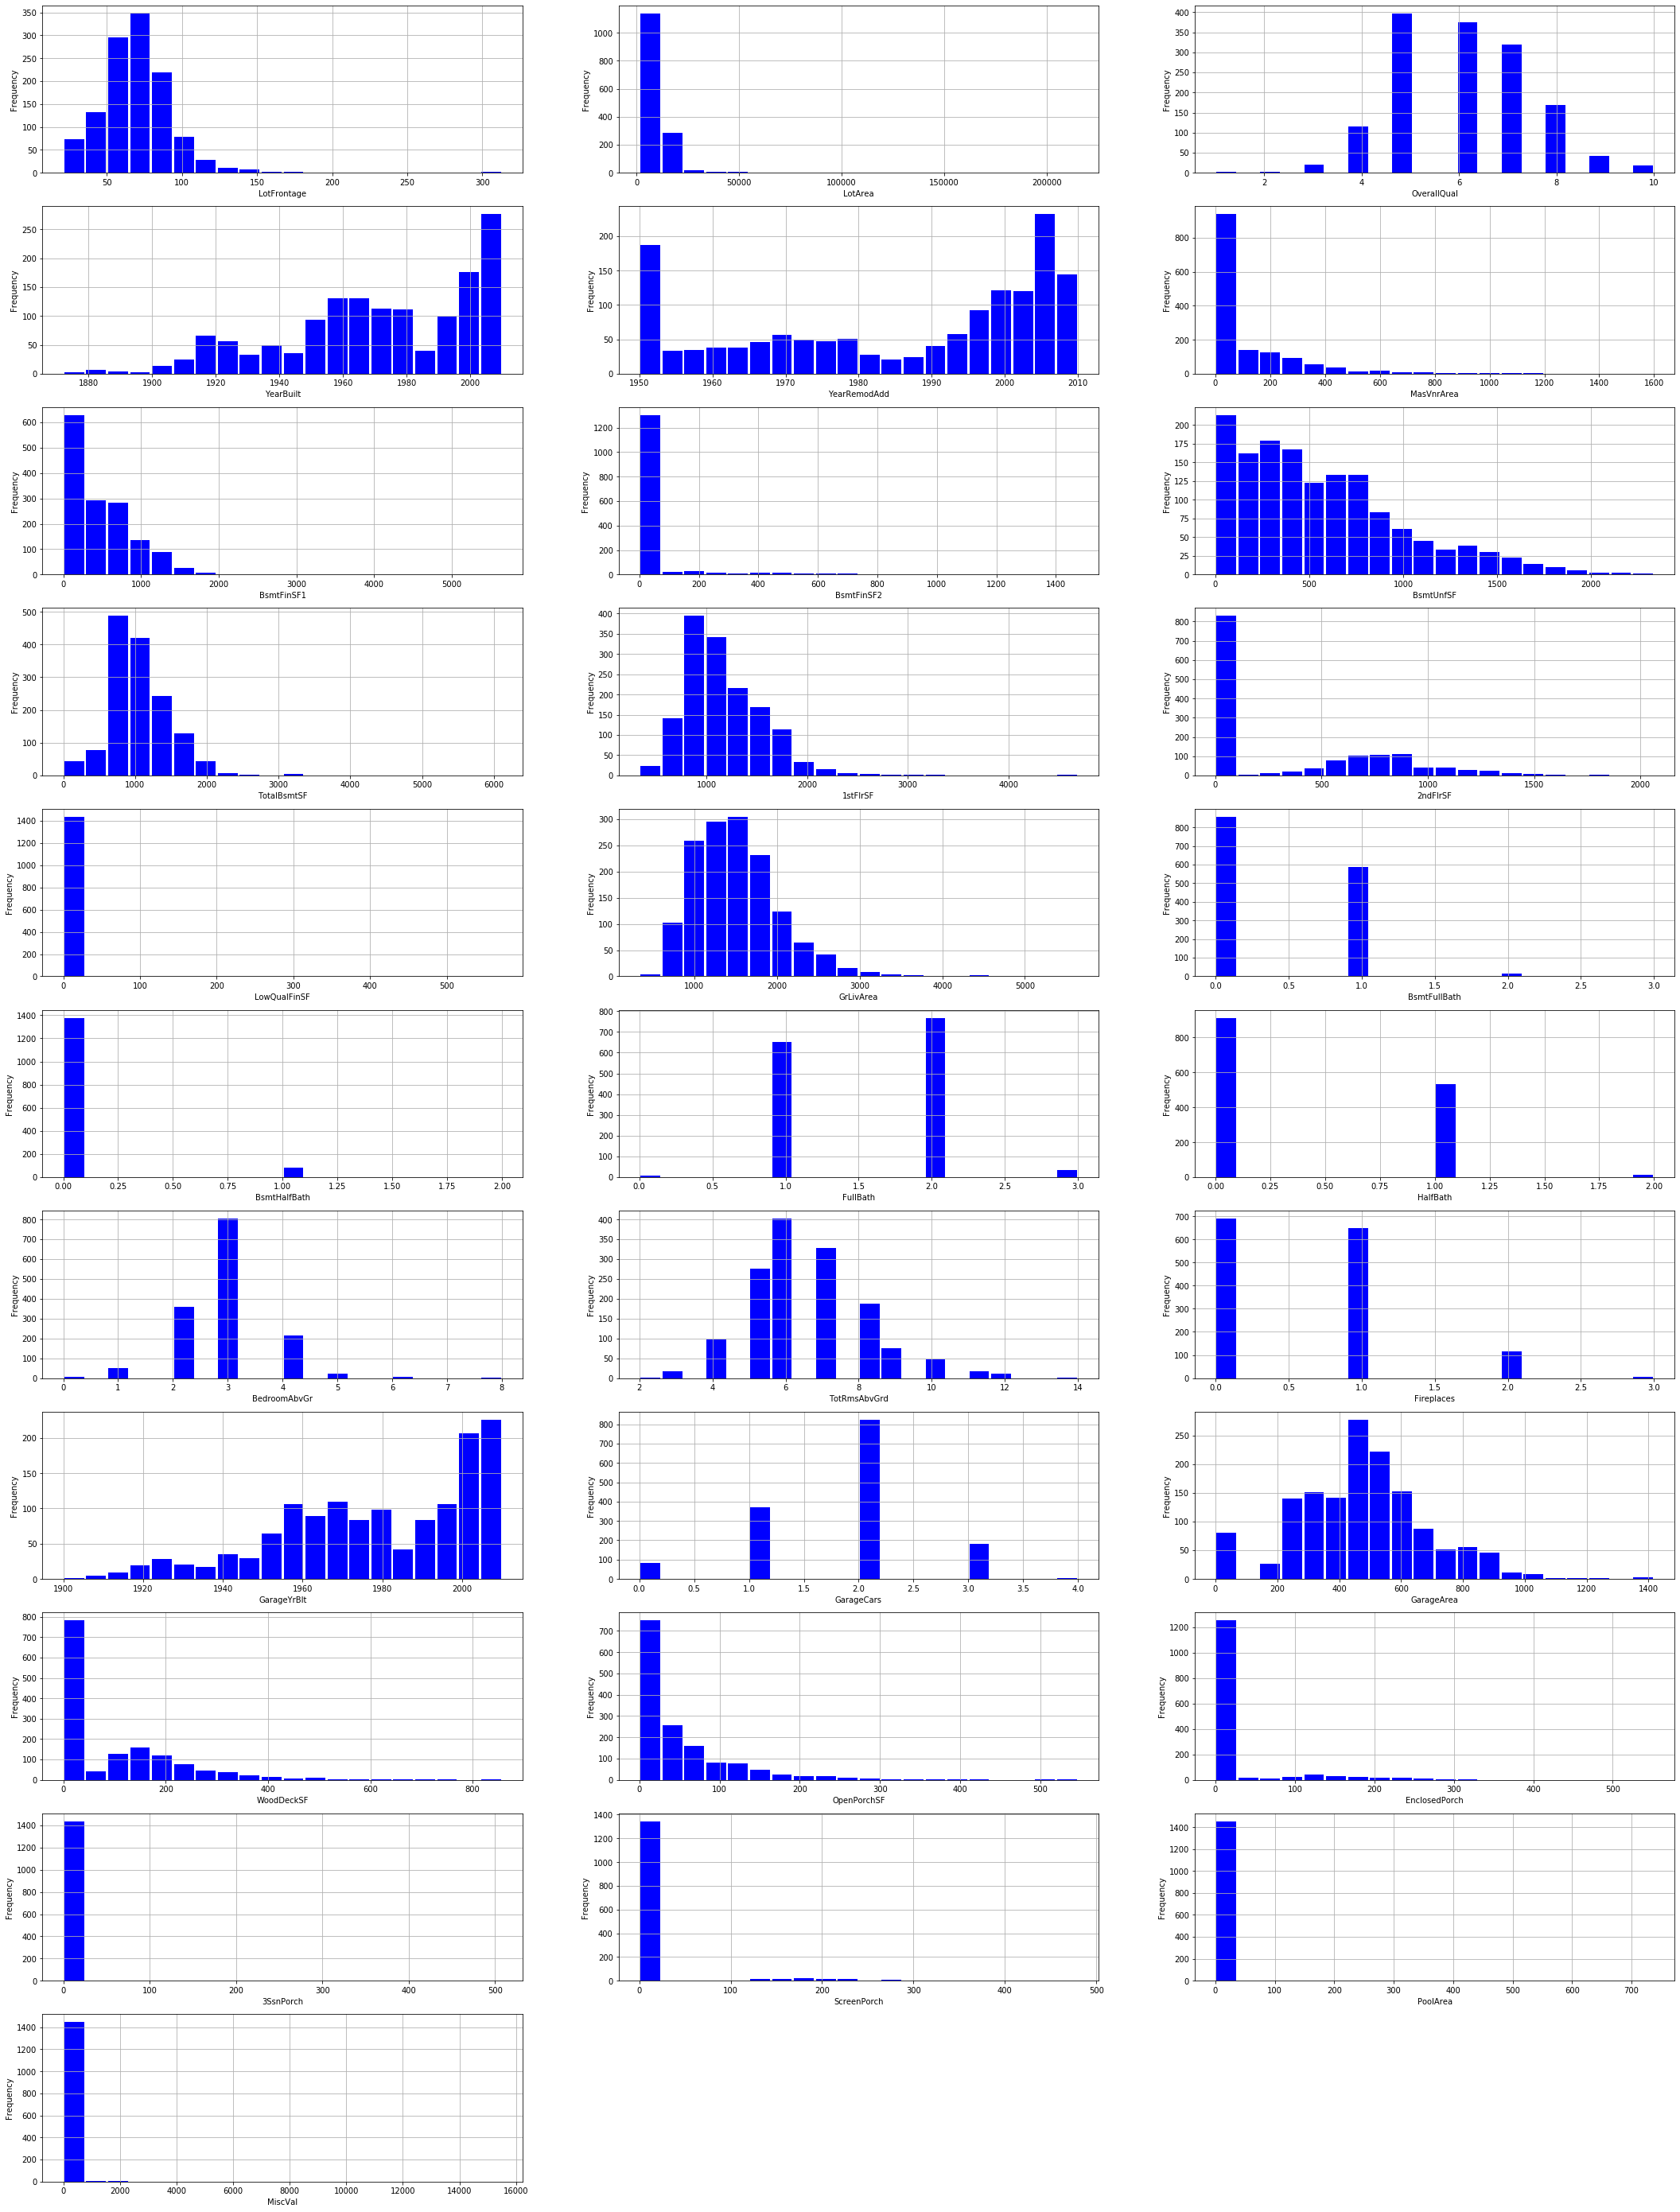

In [23]:
### Distribution of continous variables
fig= plt.figure(figsize=(30, 40)) # adjust the figure size 
fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)
for i in range(0,31):
    j=i+1
    ax= plt.subplot(11, 3, j)
    df[numeric_df.columns[i]].plot.hist(grid=True, bins=20, rwidth=0.9,color='blue')
    plt.xlabel(numeric_df.columns[i])
    plt.ylabel('Frequency') 

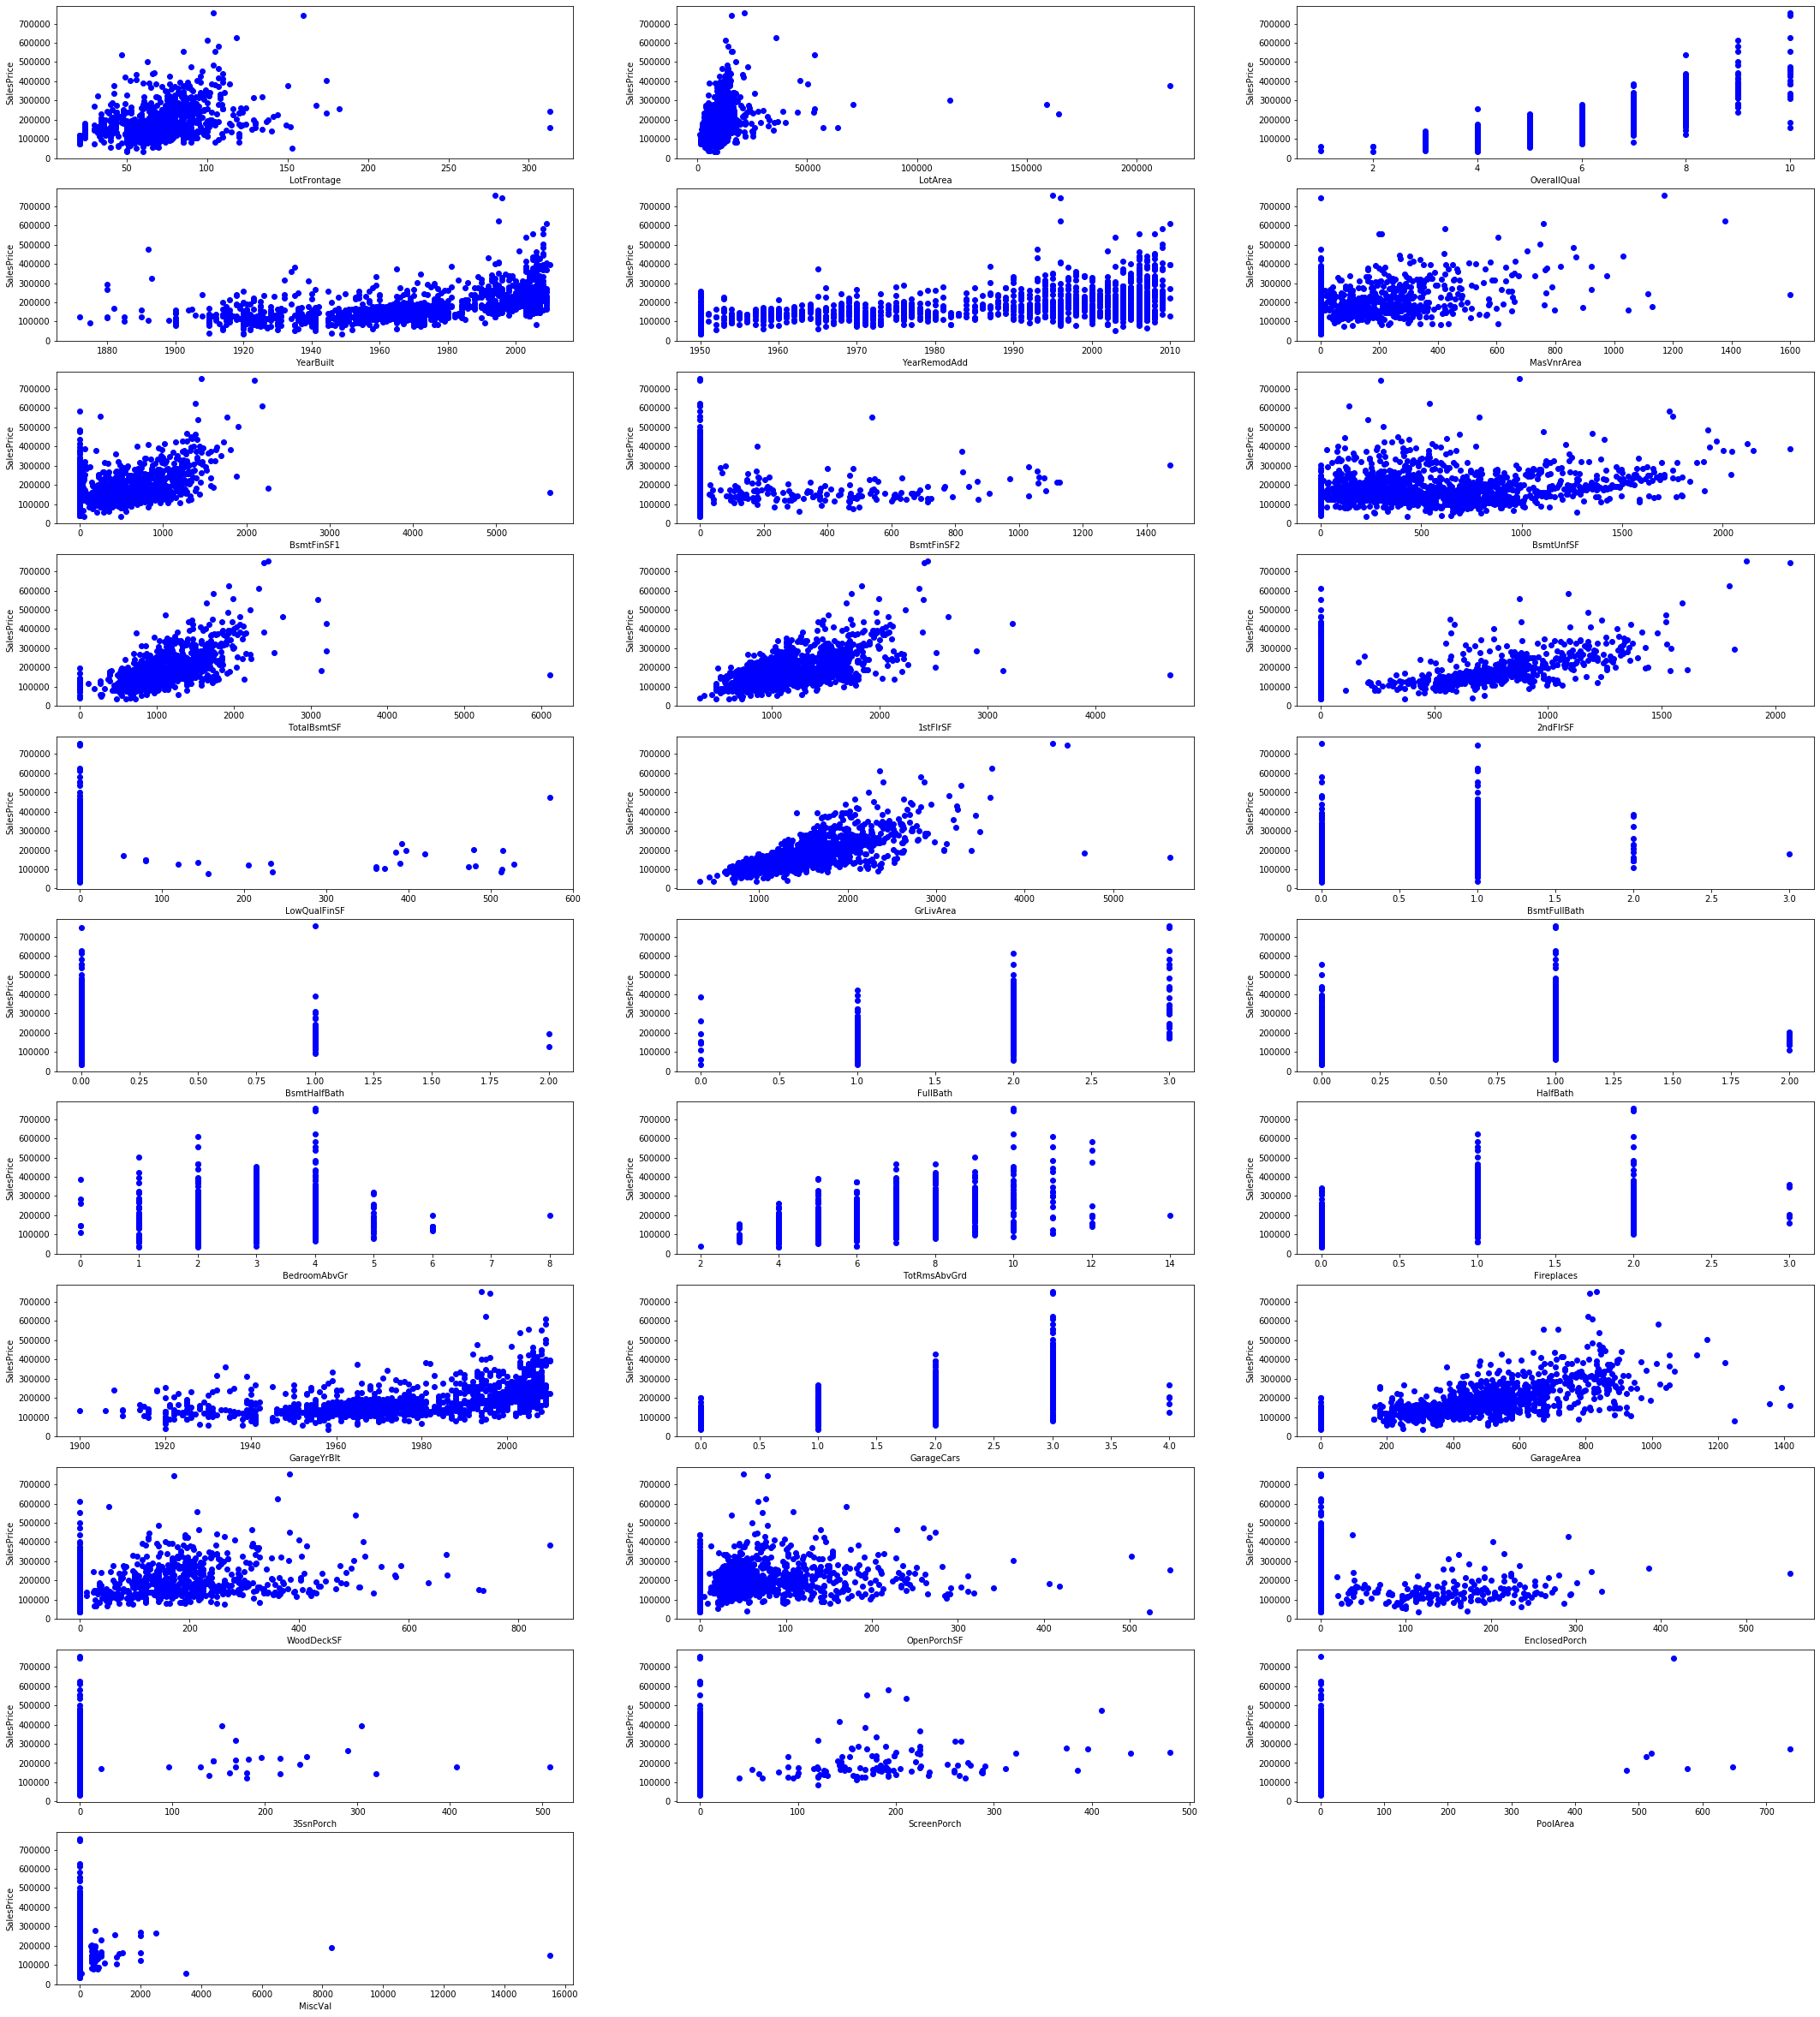

In [24]:
### Relationship of continous variable with salesprice
fig= plt.figure(figsize=(30, 40)) # adjust the figure size 
fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)
for i in range(0,31):
    j=i+1
    ax= plt.subplot(13, 3, j)
    plt.scatter(numeric_df[numeric_df.columns[i]],numeric_df['SalePrice'],color='blue')
    plt.xlabel(numeric_df.columns[i])
    plt.ylabel('SalesPrice') 

In [25]:
## Identify catagorical features
catagorical_df=df.select_dtypes(exclude=['int','float'])

In [26]:
print(catagorical_df.columns)

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')


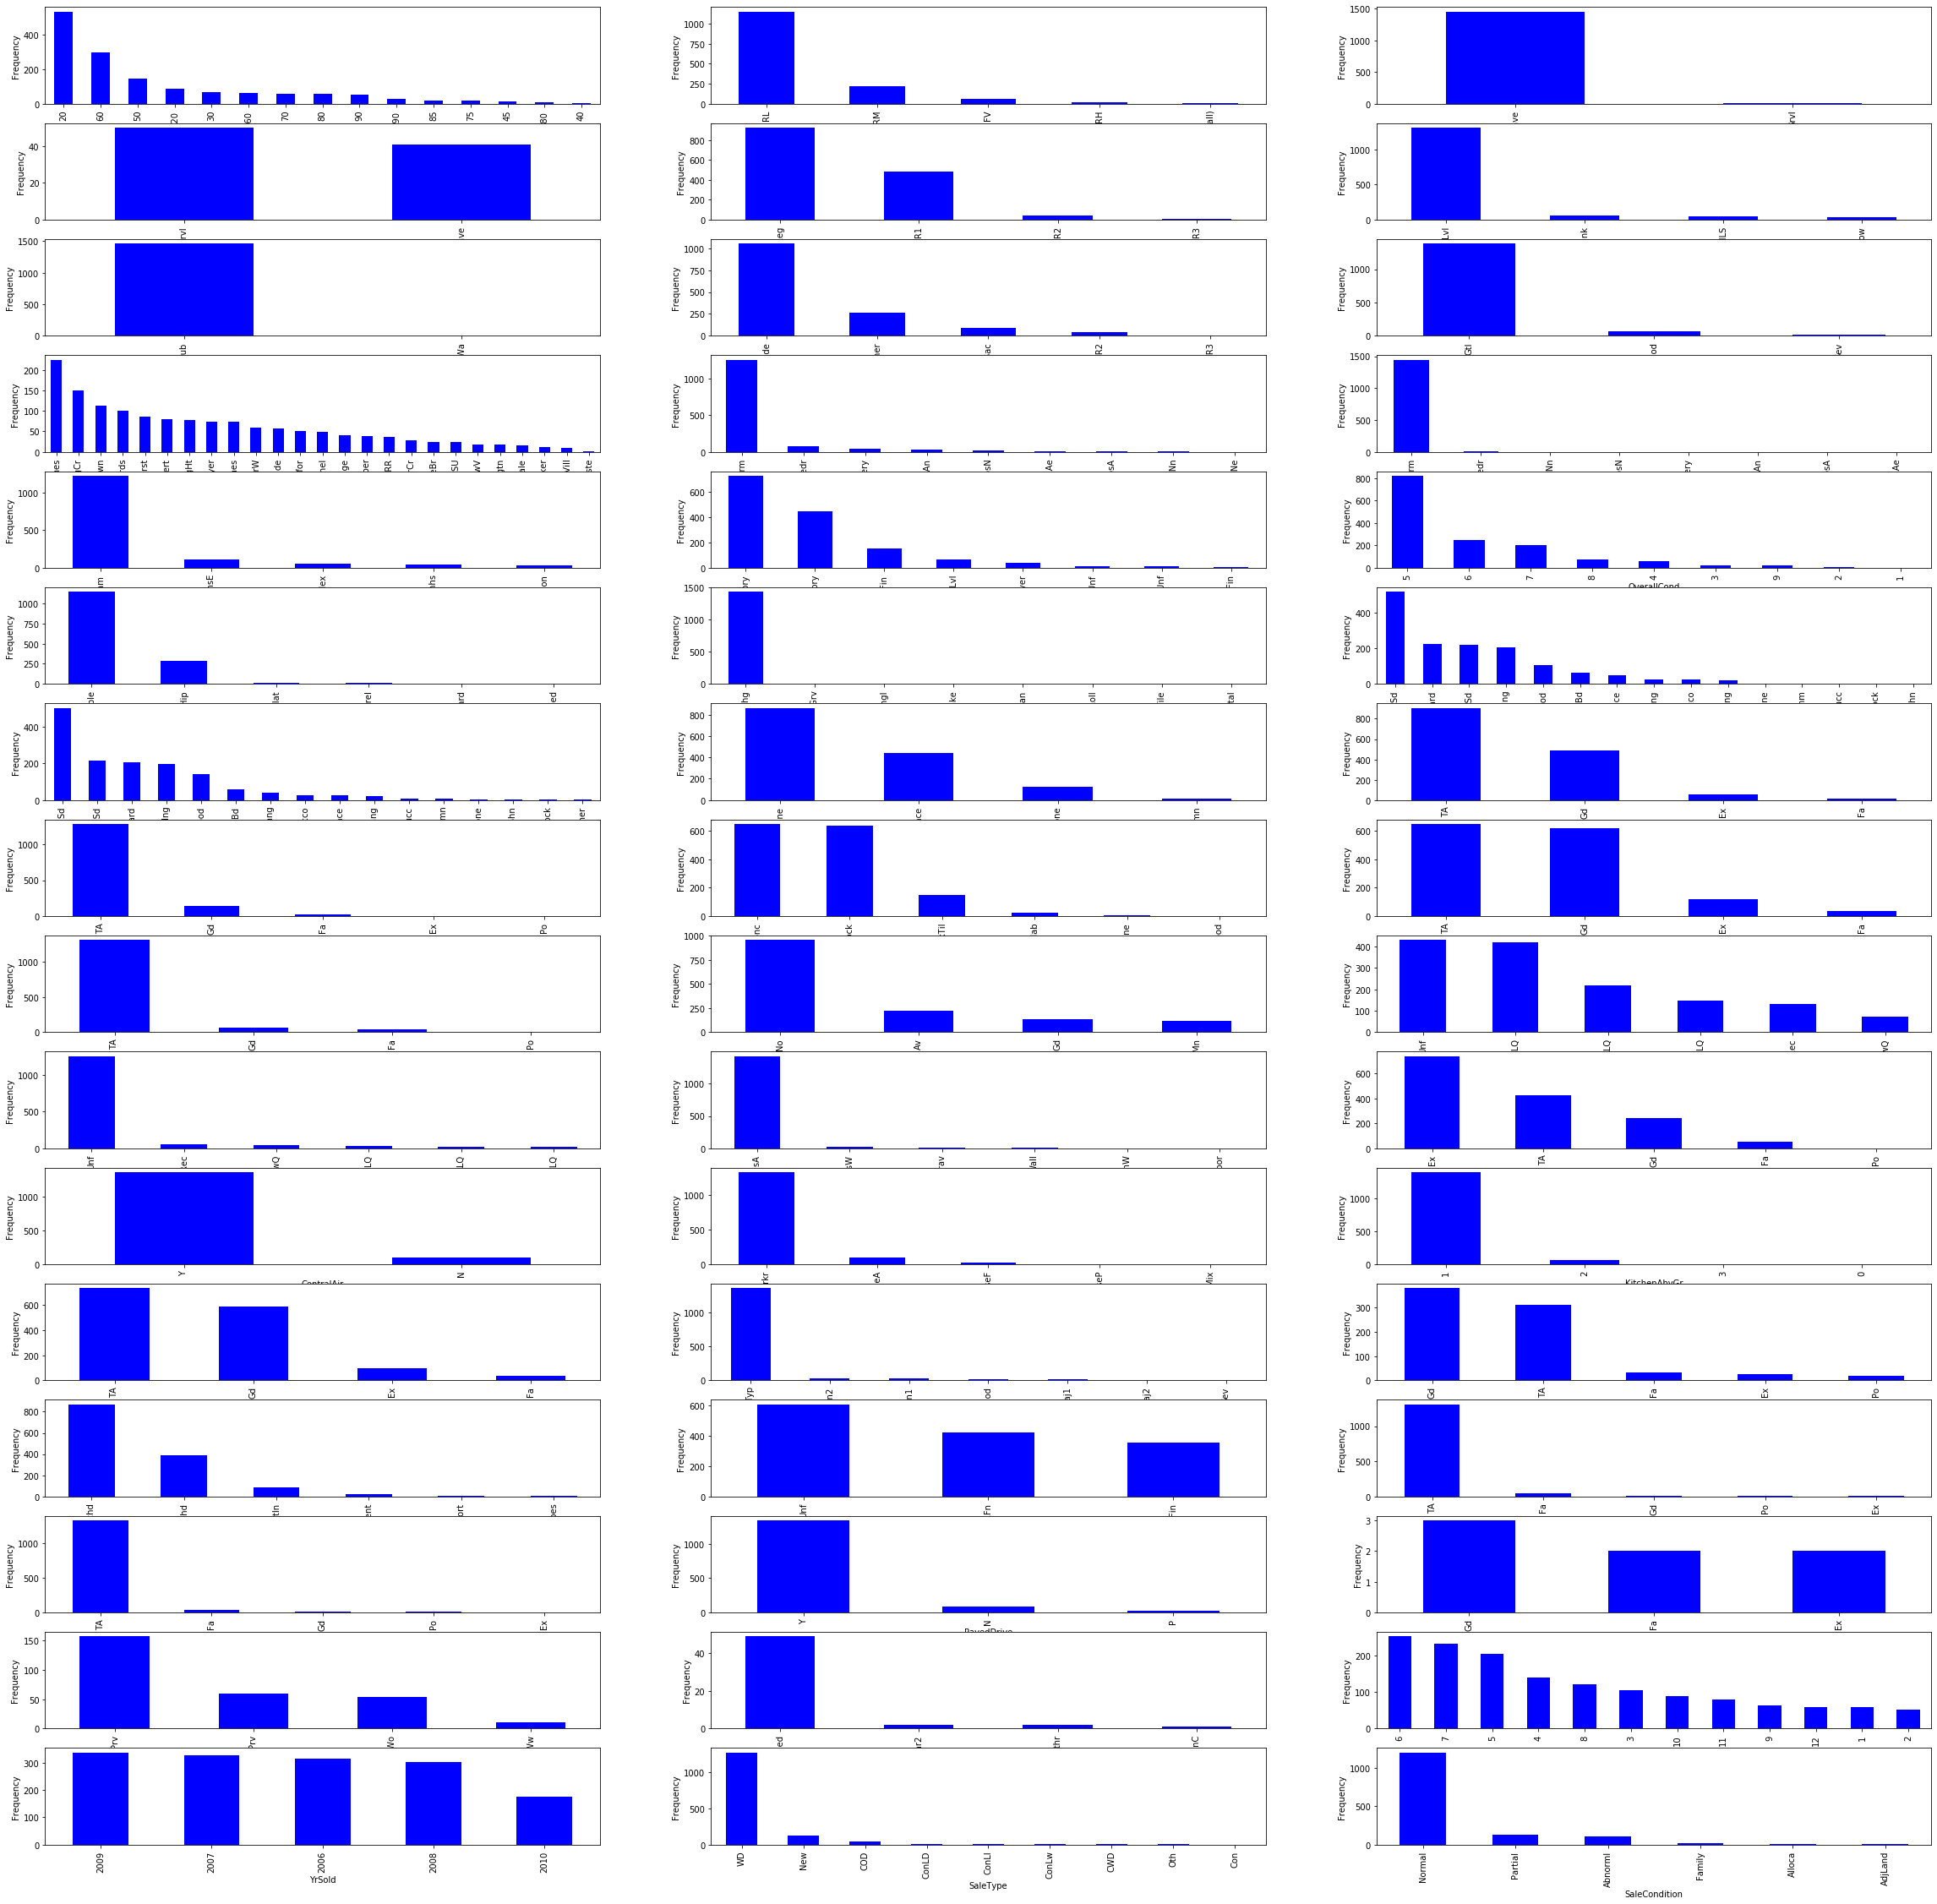

In [27]:
### Visualize the catagorical variables 
fig, ax = plt.subplots(16, 3, figsize=(40,40)) # adjust the figure size 
for i in range(0,len(catagorical_df.columns)):
    j=i+1
    ax=plt.subplot(16, 3, j)
    catagorical_df[catagorical_df.columns[i]].value_counts().plot(kind='bar',color='blue')
    plt.xlabel(catagorical_df.columns[i])
    plt.ylabel('Frequency') 

## II: Feature Enigneering 

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice',axis=1),df['SalePrice'],test_size=0.3,random_state=0)

In [30]:
### Check missing values
X_train.isnull().mean()[X_train.isnull().mean().values!=0]

LotFrontage     0.184932
Alley           0.939335
MasVnrType      0.004892
MasVnrArea      0.004892
BsmtQual        0.023483
BsmtCond        0.023483
BsmtExposure    0.023483
BsmtFinType1    0.023483
BsmtFinType2    0.024462
Electrical      0.000978
FireplaceQu     0.467710
GarageType      0.052838
GarageYrBlt     0.052838
GarageFinish    0.052838
GarageQual      0.052838
GarageCond      0.052838
PoolQC          0.997065
Fence           0.813112
MiscFeature     0.956947
dtype: float64

In [31]:
### Delete variables with too many missing values
X_train=X_train.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1) ## Drop variables with too many NA's
X_test=X_test.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1) ## Drop variables with too many NA's

In [32]:
catagorical_var=X_train.select_dtypes(exclude=['int','float']).columns

In [33]:
catagorical_var=list(catagorical_var)

In [34]:
numeric_var=X_train.select_dtypes(['int','float']).columns

In [35]:
numeric_var=list(numeric_var)

In [36]:
# let's impute the NA with  the median for both numeric and catagorical variables
from feature_engine import missing_data_imputers as mdi
from sklearn.pipeline import Pipeline

In [37]:
pipe_imp = Pipeline([
    ('imputer_mode', mdi.FrequentCategoryImputer(variables=list(catagorical_var))),
    ('imputer_median', mdi.MeanMedianImputer(imputation_method = 'median',
                                             variables=list(numeric_var))),
    ])

In [38]:
# fit the imputation pipline
pipe_imp.fit(X_train)

Pipeline(memory=None,
         steps=[('imputer_mode',
                 FrequentCategoryImputer(variables=['MSSubClass', 'MSZoning',
                                                    'Street', 'LotShape',
                                                    'LandContour', 'Utilities',
                                                    'LotConfig', 'LandSlope',
                                                    'Neighborhood',
                                                    'Condition1', 'Condition2',
                                                    'BldgType', 'HouseStyle',
                                                    'OverallCond', 'RoofStyle',
                                                    'RoofMatl', 'Exterior1st',
                                                    'Exterior2nd', 'MasVnrType',
                                                    'ExterQual', 'ExterCond',
                                                    'Foundatio...
                         

In [39]:
X_train= pipe_imp.transform(X_train)

In [40]:
X_test= pipe_imp.transform(X_test)

In [41]:
### This function is used to combine different rare catagories 
def deal_uncommon (var,data,freq):
    freq_counts=data[var].value_counts()
    mask=data[var].isin(freq_counts[freq_counts < freq].index)
    data[var][mask] = 'Other'
    return (data) 

In [42]:
### Estimate the frequency of each catagories within one variable
result_freq=[]

In [43]:
for i in range(len(X_train[catagorical_var].columns)):
    s=X_train[X_train[catagorical_var].columns[i]].value_counts()
    result_freq.append({X_train[catagorical_var].columns[i]:s.to_dict()})

In [44]:
result_freq

[{'MSSubClass': {'20': 377,
   '60': 215,
   '50': 99,
   '120': 60,
   '160': 48,
   '30': 47,
   '70': 45,
   '80': 36,
   '90': 33,
   '190': 21,
   '85': 13,
   '45': 11,
   '75': 10,
   '180': 4,
   '40': 3}},
 {'MSZoning': {'RL': 819, 'RM': 142, 'FV': 38, 'RH': 14, 'C (all)': 9}},
 {'Street': {'Pave': 1017, 'Grvl': 5}},
 {'LotShape': {'Reg': 642, 'IR1': 345, 'IR2': 29, 'IR3': 6}},
 {'LandContour': {'Lvl': 923, 'Bnk': 44, 'HLS': 28, 'Low': 27}},
 {'Utilities': {'AllPub': 1021, 'NoSeWa': 1}},
 {'LotConfig': {'Inside': 741,
   'Corner': 181,
   'CulDSac': 68,
   'FR2': 31,
   'FR3': 1}},
 {'LandSlope': {'Gtl': 962, 'Mod': 50, 'Sev': 10}},
 {'Neighborhood': {'NAmes': 151,
   'CollgCr': 105,
   'OldTown': 73,
   'Edwards': 71,
   'Sawyer': 61,
   'Somerst': 56,
   'Gilbert': 55,
   'NridgHt': 51,
   'NWAmes': 51,
   'SawyerW': 45,
   'BrkSide': 41,
   'Mitchel': 36,
   'Crawfor': 35,
   'Timber': 30,
   'NoRidge': 30,
   'ClearCr': 24,
   'IDOTRR': 24,
   'SWISU': 18,
   'StoneBr': 16

In [45]:
catagorical_var=list(catagorical_var)

In [46]:
### Drop Utilities
X_train["Utilities"].value_counts()
X_train=X_train.drop("Utilities",axis=1)
X_test=X_test.drop("Utilities",axis=1)

In [47]:
catagorical_var.remove("Utilities")

In [48]:
### Variables that need combine
var_name_fix=['MSSubClass',"LotConfig","Neighborhood","Condition1","Condition2","OverallCond"
             ,'RoofStyle','Exterior1st','Exterior2nd','ExterCond','Foundation','Heating']
freq=[11,31,10,10,4,14,6,15,8,25,19,6]

In [49]:
for var,cut in zip(var_name_fix,freq):
    X_train=deal_uncommon (var,X_train,cut)
    X_test=deal_uncommon (var,X_test,cut)

/Applications/anaconda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [50]:
### Bin numeric features with less observation as catagorical 
bin_freatures=["LowQualFinSF","PoolArea","3SsnPorch"]

In [51]:
for i in bin_freatures:
    bins = [-np.inf,np.median(X_train[i]),np.inf]
    labels = ['Low','High']
    new_name=i+"_binned"
    X_train[new_name]=pd.cut(X_train[i],bins=bins,labels=labels)
    X_test[new_name]=pd.cut(X_test[i],bins=bins,labels=labels)
    X_train=X_train.drop(i,axis=1) 
    X_test=X_test.drop(i,axis=1) 

In [52]:
catagorical_var=list(catagorical_var)

In [ ]:
ohe_enc = OneHotCategoricalEncoder(
    top_categories=10,  # you can change this value to select more or less variables
    # we can select which variables to encode
    variables=catagorical_var,
    drop_last= True)


In [ ]:
ohe_enc.fit(X_train)

X_train_new = ohe_enc.transform(X_train)
X_test_new = ohe_enc.transform(X_test)

In [ ]:
numeric_var=['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
       'MiscVal']

In [ ]:
### Scale numeric variables 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_new[numeric_var])

In [ ]:
X_train_new[numeric_var]=scaler.transform(X_train_new[numeric_var])
X_test_new[numeric_var]=scaler.transform(X_test_new[numeric_var])

In [ ]:
X_train_new.shape, X_test_new.shape

In [ ]:
X_train_new.dtypes=="object"

In [ ]:
print("New number of features : " + str(X_train_new.shape[1]))

In [63]:
X_train_new=pd.read_csv("train.csv")
X_test_new=pd.read_csv("test.csv")

In [64]:
X_train_original = X_train_new.copy()
X_test_original = X_test_new.copy()

First,I will build a benchmark model to compare with. I will compare how feature selection would make difference for model building 
from (1): reduce the dimensionality of feature space (2) RMSE (3) reduce the amount of training time.

In [65]:
y_train_log=np.log(y_train)
y_test_log=np.log(y_test)

In [66]:
## The group of leaners are used to assess the performances of feature selection methods. 
## They consists for regulization and tree models which are usually used to deal with high dimensional data 

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as r2
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Random Forest 
def run_randomForests(X_train, X_test, y_train, y_test):
    start = time.time()
    params_rf = {'n_estimators':[50,350,500],
                'max_features':['log2', 'auto', 'sqrt'],
                'min_samples_leaf':[5,10,30]}
    rf = RandomForestRegressor()
    grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       n_jobs=-1)
    grid_rf.fit(X_train, y_train)
    best_model = grid_rf.best_estimator_
    pred_train = best_model.predict(X_train)
    print('Train set')
    print('Random Forests RMSE: {}'.format(MSE(y_train, pred_train)**(1/2)))
    print('R Square: {}'.format(r2(y_train, pred_train)))
    print('Test set')
    pred_test = best_model.predict(X_test)
    print('Random Forests RMSE: {}'.format(MSE(y_test, pred_test)**(1/2)))
    print('R Square: {}'.format(r2(y_test, pred_test)))
    end = time.time()
    print('Running time in seconds:{}'.format((end - start)))
 
       
### gBoost 
def run_gBoost(X_train, X_test, y_train, y_test):
    start = time.time()
    GBest = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3,
                                       max_features='sqrt',
                                       min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train,
                                                                                                    y_train)
    print('Train set')
    predict_train = GBest.predict(X_train)
    print('Gboost RMSE: {}'.format(MSE(y_train, predict_train)**(1/2)))
    print('Gboost r square: {}'.format(r2(y_train, predict_train)))
    print('Test set')
    predict_test = GBest.predict(X_test)
    print('Gboost RMSE: {}'.format(MSE(y_test, predict_test)**(1/2)))
    print('Gboost r square: {}'.format(r2(y_test, predict_test))) 
    end = time.time()
    print('Running time in seconds:{}'.format((end - start)))

### Lasso 
from sklearn.linear_model import LassoCV
def run_lasso(X_train, X_test, y_train, y_test):
    start = time.time()
    lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003,
                              0.006, 0.01, 0.03, 0.06, 0.1, 
                              0.3, 0.6, 1], max_iter = 5000, cv = 10)
    lasso.fit(X_train,y_train)
    alpha = lasso.alpha_
    print("Best alpha :", alpha)
    print('Train set')
    predict_train=lasso.predict(X_train)
    print('lasso RMSE: {}'.format(MSE(y_train, predict_train)**(1/2)))
    print('lasso r square: {}'.format(r2(y_train, predict_train)))
    predict_test = lasso.predict(X_test)
    print('lasso RMSE: {}'.format(MSE(y_test, predict_test)**(1/2)))
    print('lasso r square: {}'.format(r2(y_test, predict_test))) 
    end = time.time()
    print('Running time in seconds:{}'.format((end - start)))

In [ ]:
run_randomForests(X_train_original,X_test_original, y_train_log, y_test_log)

In [ ]:
run_randomForests(X_train_original,X_test_original, y_train, y_test)
run_gBoost(X_train_original,X_test_original, y_train, y_test)
run_lasso(X_train_original,X_test_original, y_train, y_test)

## III.Feature Selection 

### a. Unsupervised selection 

### 1. Remove constant features

In [ ]:
def const_remove(X_train,X_test):
    ###: This function screen and move constant features
    constant_features = [feat for feat in X_train.columns if X_train[feat].std() == 0] 
    ### Constant features are defines as with variance=0
    X_train=X_train.drop(labels=constant_features, axis=1)
    X_test= X_test.drop(labels=constant_features, axis=1)
    return(constant_features,X_train,X_test)

In [ ]:
constant_feature,X_train,X_test=const_remove(X_train,X_test)

In [ ]:
constant_feature

In [ ]:
X_train.shape,X_test.shape

### 2. Remove quasi-constant feastures 

In [ ]:
from sklearn.feature_selection import VarianceThreshold 

def var_remove(k,X_train,X_test):
    ### Note: k is the threshold as variance to detect the minority of features
    sel = VarianceThreshold(threshold=k)
    sel.fit(X_train)
    ### print out the removed values
    quasi_constant_features=[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]
    features_to_keep = X_train.columns[sel.get_support()]
    ### Fit delete features for train and test set 
    X_train = sel.transform(X_train)
    X_test= sel.transform(X_test)
    ### write the rest of features into data frame
    X_train= pd.DataFrame(X_train)
    X_train.columns =features_to_keep
    X_test= pd.DataFrame(X_test)
    X_test.columns = features_to_keep
    return(quasi_constant_features,X_train,X_test)

In [ ]:
quasi_constant_features,X_train,X_test=var_remove(0.01,X_train_new,X_test_new)

In [ ]:
quasi_constant_features

In [ ]:
X_train.shape,X_test.shape

### 3. Remove duplicated features

In [ ]:
def dup_remove(X_train,X_test):
    ### This function aims to remove duplicatd features.
    duplicated_features = []
    for i in range(0, len(X_train.columns)):
        col_1 = X_train.columns[i]
        for col_2 in X_train.columns[i + 1:]:
            if X_train[col_1].equals(X_train[col_2]):
                duplicated_features.append(col_2)
    X_train=X_train.drop(labels=duplicated_features, axis=1)
    X_test=X_test.drop(labels=duplicated_features, axis=1)
    return(duplicated_features,X_train,X_test)

In [ ]:
# remove duplicated features
duplicated_features,X_train,X_test=dup_remove(X_train_new,X_test_new)

In [ ]:
duplicated_features

In [ ]:
X_train.shape,X_test.shape

### 4. Remove correlated features

In [ ]:
def correlation(X_train,X_test,threshold):
    # This function udentify and remove correlated features
    corr_features = []  # Set of all the names of correlated columns
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                corr_features.append(colname)
    X_train=X_train.drop(labels=corr_features,axis=1)
    X_test=X_test.drop(labels=corr_features, axis=1)
    return(corr_features,X_train, X_test)

In [ ]:
corr_features,X_train, X_test=correlation(X_train,X_test,0.8)

In [ ]:
corr_features

In [ ]:
X_train.shape, X_test.shape

After unsupervised feature filtering, we remove 55 features. Here, we can verify how feature selection works :)

In [ ]:
run_randomForests(X_train,X_test, y_train, y_test)
run_gBoost(X_train,X_test, y_train, y_test)
run_lasso(X_train,X_test, y_train, y_test)

Create an feature selection pipline :D

In [ ]:
from sklearn.feature_selection import VarianceThreshold

class Unsupervised_var_select(VarianceThreshold):  
    
    def __init__(self,feature,X_train,X_test):
    ### Each object contain different feature set, train and test Set 
    ### This class can be used for parallel computing 
        self.feature=feature
        self.train=X_train
        self.test=X_test
    
    def mino_remove(self,k):
    ### Note: k is the threshold as variance to detect the minority of features
        sel = VarianceThreshold(threshold=k)
        sel.fit(self.train)
        mino_feat=[x for x in self.feature if x not in self.feature[sel.get_support()]]
        X= sel.transform(self.train)
        X= pd.DataFrame(X)
        feature_update=self.feature[sel.get_support()]
        X.columns =feature_update
        return (mino_feat,X)

    def dup_remove(self,X):
    ### This function aims to remove duplicatd features.
        duplicated_feat = []
        for i in range(0, len(X.columns)):
            col_1 = X.columns[i]
            for col_2 in X.columns[i + 1:]:
                if X[col_1].equals(X[col_2]):
                    duplicated_feat.append(col_2)
        if(len(duplicated_feat)==0):
            X=X
        else:
            X=X.drop(labels=duplicated_feat,axis=1)
        return (duplicated_feat,X)
    
    def cor_remove(self,X,threshold):
        corr_feat = []  # Set of all the names of correlated columns
        corr_matrix = X.corr()
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                    colname = corr_matrix.columns[i]  # getting the name of column
                    corr_feat.append(colname)
        if(len(corr_feat)==0):
            X=X
        else:
            X=X.drop(labels=corr_feat,axis=1)
        return (corr_feat,X)

In [ ]:
Pipline=Unsupervised_var_select(X_train_original.columns,X_train_original,X_test_original)
cons_feat,X_train_0=Pipline.mino_remove(0.01)
duplicated_feat,X_train_1=Pipline.dup_remove(X_train_0)
corr_feat,X_train_2=Pipline.cor_remove(X_train_1,0.8)

X_test_2=X_test_original[X_train_2.columns]

In [ ]:
cons_feat,duplicated_feat,corr_feat

In [ ]:
X_test_2.shape,X_train_2.shape

### b. Supervised Method 

###  1. Filter Methods

<font size="3">
a. How to measure of feature importance? (Define Metrics)
b. How to determine which features are more important? (Define Cut-off )
c. Searching algorithms? (Univariate or mutivariate selection)

In [ ]:
rf=RandomForestRegressor()

### Evaluation Score 

In [ ]:
### Metric 1: RMSE
def MSE_accuracy(rf, X_train, y_train):
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_train)
    MSE_score = MSE(y_train,y_pred)
    return MSE_score

In [ ]:
### Metric 2: R_2
def r2_accuracy(rf, X_train, y_train):
    rf.fit(X_train,y_train)
    r2_score = r2(y_train,rf.predict(X_train))
    return r2_score

### Feature Importances 

In [ ]:
### Default rf importance
def rf_importance(rf,X_train,y_train):
    rf.fit(X_train,y_train)
    importances = pd.Series(data=rf.feature_importances_, index= X_train.columns)
    return (importances)

In [ ]:
rf_value=rf_importance(rf,X_train,y_train)

In [ ]:
Imp_feature=rf_value.sort_values(axis=0,ascending=False)[0:20]
Imp_feature

In [ ]:
sns.set()
_=Imp_feature.plot('barh',align='center', alpha=0.5)
_=plt.ylabel('Feature')
_=plt.xlabel('Default feature importance :sklearn')

In [ ]:
run_randomForests(X_train[Imp_feature.index],
                  X_test[Imp_feature.index],
                  y_train,
                  y_test)

run_gBoost(X_train[Imp_feature.index],
                  X_test[Imp_feature.index],
                  y_train,
                  y_test)

run_lasso(X_train[Imp_feature.index],
                  X_test[Imp_feature.index],
                  y_train,
                  y_test)

Pros:
fast calculation
easy to retrieve — one command

Cons:
biased approach, as it has a tendency to inflate the importance of continuous features or high-cardinality categorical variables (see strobl et al., 2007)

Terence Parr, Kerem Turgutlu, Christopher Csiszar, and Jeremy Howard
, 2018. See: https://explained.ai/rf-importance/index.html

In [ ]:
def permutation_importances(rf, X_train, y_train, metric):
    baseline = metric(rf, X_train, y_train)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col]) ## I permute each columns with existing values
        m = metric(rf, X_train, y_train) 
        X_train[col] = save
        imp.append(abs(baseline - m)/baseline)
    features=pd.Series(imp)
    features.index=X_train.columns[features.index]
    return features

In [ ]:
perm_value=permutation_importances(rf, X_train, y_train,MSE_accuracy)

In [ ]:
perm_features=perm_value.sort_values(axis=0,ascending=False)[0:20]

In [ ]:
perm_features

In [ ]:
sns.set()
_=perm_features.plot('barh',align='center', alpha=0.5)
_=plt.ylabel('Feature')
_=plt.xlabel('Permutation feature importance :% decrease in MSE')

In [ ]:
run_randomForests(X_train[perm_features.index],
                  X_test[perm_features.index],
                  y_train,
                  y_test)

run_gBoost(X_train[perm_features.index],
                  X_test[perm_features.index],
                  y_train,
                  y_test)

run_lasso(X_train[perm_features.index],
                  X_test[perm_features.index],
                  y_train,
                  y_test)

Pros:
applicable to any model
reasonably efficient
reliable technique
no need to retrain the model at each modification of the dataset

Cons:
more computationally expensive than the default feature_importances
permutation importance overestimates the importance of correlated predictors — Strobl et al (2008)

Other importances

In [ ]:
def drop_importances(rf, X_train, y_train,metric):
    rf.fit(X_train, y_train)
    baseline = metric(rf, X_train, y_train)
    imp = []
    for col in X_train.columns:
        X = X_train.drop(col, axis=1)
        rf_ = rf
        rf_.random_state = 999
        rf_.fit(X_train, y_train)
        drop = metric(rf_,X_train, y_train)
        imp.append(baseline - drop)
    imp = np.array(imp)
    I = pd.DataFrame(
            data={'Feature':X_train.columns,
                  'Importance':imp})
    I = I.set_index('Feature')
    I = I.sort_values('Importance', ascending=False)
    return I

In [ ]:
drop_value=drop_importances(rf, X_train, y_train,MSE_accuracy)

In [ ]:
drop_feature=drop_value.index[0:20]
drop_feature

In [ ]:
run_randomForests(X_train[drop_feature],
                  X_test[drop_feature],
                  y_train,
                  y_test)

In [ ]:
### Local threshold 
def shuffle_importances(rf,X_train,y_train,metric):
    imp = []
    baseline = metric(rf, X_train, y_train)
    for feature in X_train.columns:
        X_train_c = X_train.copy()
        # Shuffle individual feature
        X_train_c[feature]=X_train_c[feature].sample(frac=1).reset_index(drop=True)
        # Make prediction with shuffled feature and calculate MSE
        shuff_MSE =metric(rf,X_train_c, y_train)
        # save the drop in MSE
        imp.append(baseline - shuff_MSE)
        # Feature importance measured by drop in MSE
    I=pd.Series(imp)
    I.index=X_train.columns
    I=I.sort_values(ascending=True)
    return I

In [ ]:
shuffle_feature=drop_value.index[1:20]
shuffle_feature

In [ ]:
run_randomForests(X_train[shuffle_feature],
                  X_test[shuffle_feature],
                  y_train,
                  y_test)

In [ ]:
def shuffle_importances(rf,X_train,y_train,metric):

## New Method 

My Method : (1) I want use RF feature importance. 
            (2) I want feature of "permutaiton" based test.
            (3) I want a more reliable way to set the cut-off. 

Summary : RF importance + emperical statistical testing.



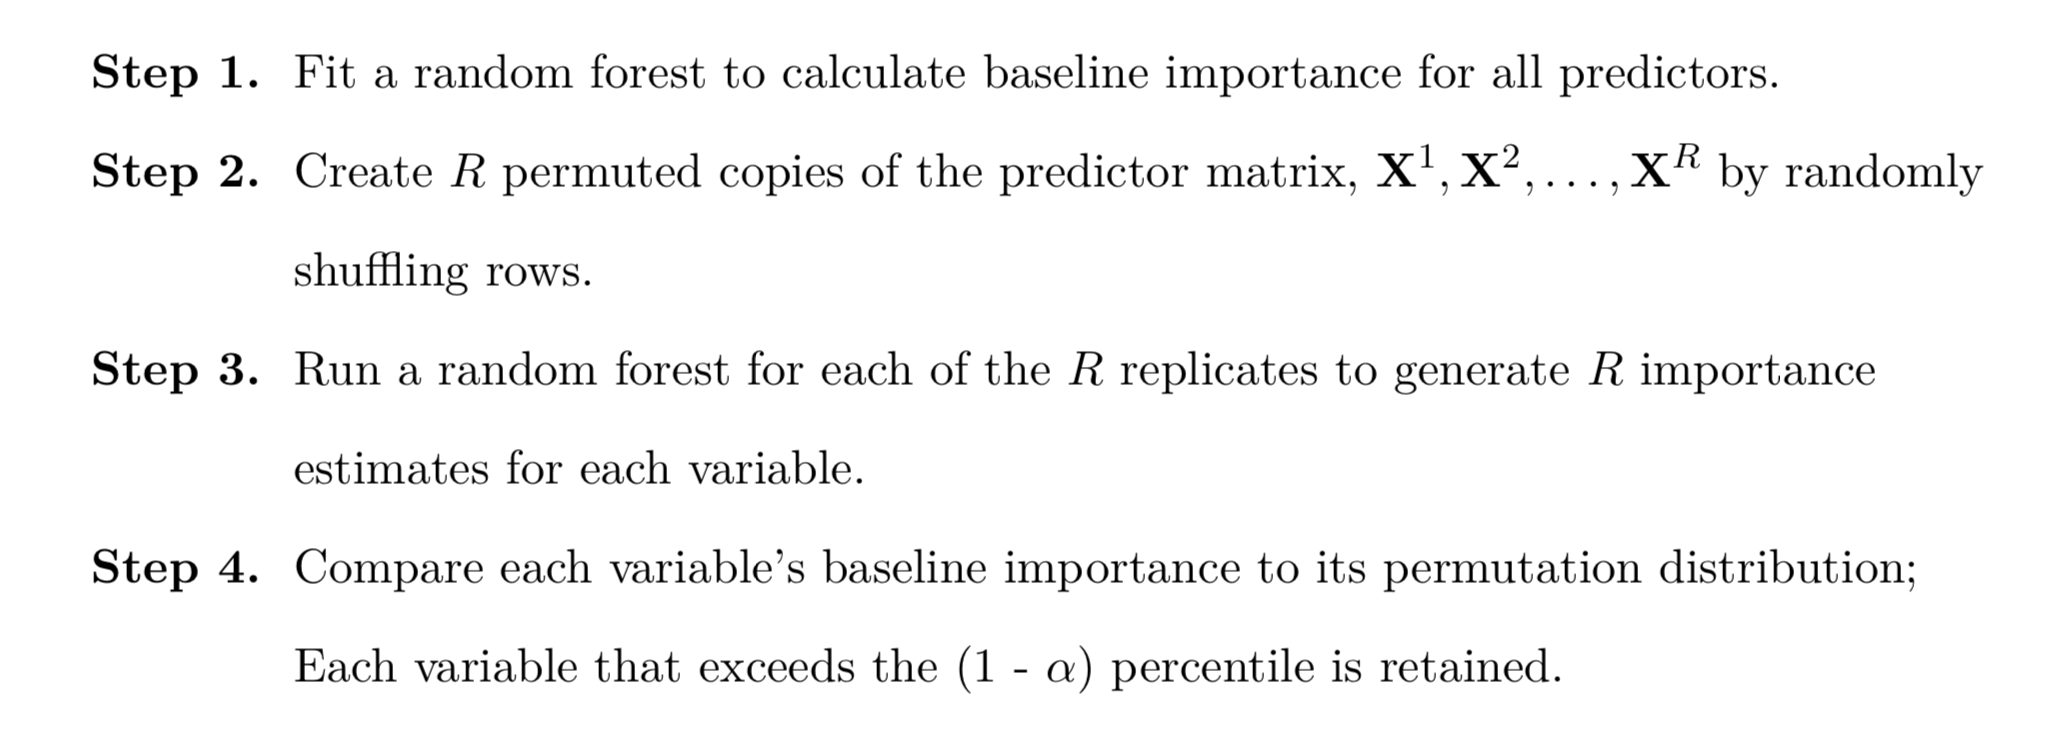

In [68]:
Image(filename='RF.png')

In [ ]:
def perm_sel(num_perm,rf,X_train,y_train,alpha):
    ### num_perm is the number of permutation sample created
    ### alpha : the type.I error rate 
    base=rf_importance(rf,X_train,y_train)
    X_train_c=X_train.copy()
    results = pd.DataFrame([rf_importance(rf,X_train_c.sample(frac=1),y_train) for i in range(num_perm)],columns=X_train.columns)
    cut_off=results.quantile(1-alpha)
    index_mark=base>cut_off
    selected_test=X_train.columns[index_mark]
    selected_feature=X_train.columns[index_mark]
    return(selected_feature)

In [ ]:
num_perm=20
alpha=0.05
### num_perm is the number of permutation sample created
### alpha : the type.I error rate 
base=rf_importance(rf,X_train,y_train)
X_train_c=X_train.copy()
results = pd.DataFrame([rf_importance(rf,X_train_c.sample(frac=1),y_train) for i in range(num_perm)],columns=X_train.columns)


In [ ]:
g=results.max()

In [ ]:
g


In [ ]:
cut_off=results.quantile(1-alpha)
index_mark=base>cut_off
selected_test=X_train.columns[index_mark]
selected_feature=X_train.columns[index_mark]
return(selected_feature)

In [ ]:
sel_feature=perm_sel(1000,rf,X_train,y_train,0.15)

In [ ]:
sel_feature

In [ ]:
run_randomForests(X_train[sel_feature],
                  X_test[sel_feature],
                  y_train,
                  y_test)

run_gBoost(X_train[sel_feature],
           X_test[sel_feature],
                  y_train,
                  y_test)

run_lasso(X_train[sel_feature],
         X_test[sel_feature],
                  y_train,
                  y_test)

### This function could used for any models 
def perm_score(model,X_train,y_train):
    baseline = model.score(X_train, y_train)
    imp = []
    for col in X_valid.columns:
        save = X_valid[col].copy()
        X_valid[col] = np.random.permutation(X_train[col])
        m = model.score(X_train, y_train)
        X_train[col] = save
        imp.append(baseline - m)

### 2. Wapper Method

In [ ]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
sfs1 = SFS(RandomForestRegressor(), 
           k_features=10, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

In [ ]:
selected_feat=X_train.columns[list(sfs1.k_feature_idx_)]

In [ ]:
selected_feat

In [ ]:
run_randomForests(X_train[selected_feat],
                  X_test[selected_feat],
                  y_train,
                  y_test)


run_gBoost(X_train[selected_feat],
           X_test[selected_feat],
                  y_train,
                  y_test)

run_lasso(X_train[selected_feat],
         X_test[selected_feat],
                  y_train,
                  y_test)

### 3. Mixed Model : Hybird Approach

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
sel_ = RFE(RandomForestRegressor(n_estimators=100), n_features_to_select=20)
sel_.fit(X_train, y_train)

In [ ]:
selected_feat_mix = X_train.columns[(sel_.get_support())]

In [ ]:
selected_feat_mix

In [ ]:
run_randomForests(X_train[selected_feat_mix],
                  X_test[selected_feat_mix],
                  y_train,
                  y_test)


run_gBoost(X_train[selected_feat_mix],
           X_test[selected_feat_mix],
                  y_train,
                  y_test)

run_lasso(X_train[selected_feat_mix],
          X_test[selected_feat_mix],
                  y_train,
                  y_test)

## III. Feature Validation and Conclusion 

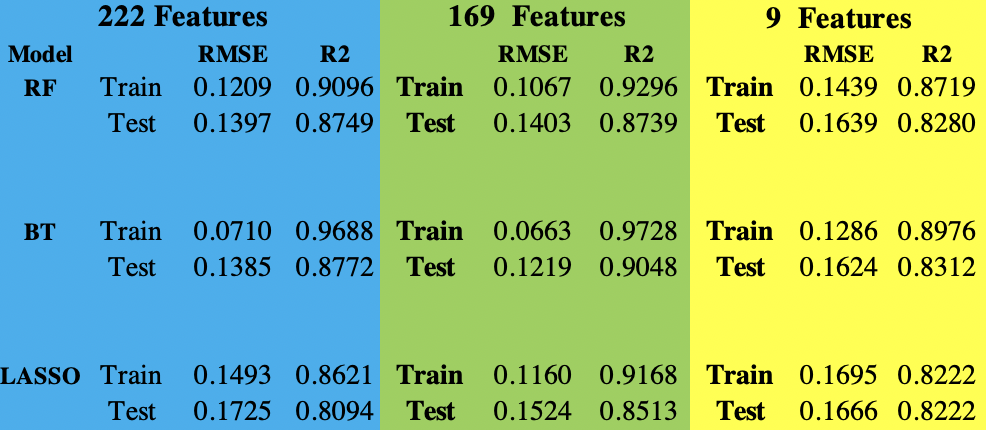

In [6]:
Image(filename='result.png')

### We can validate selected feature with subjective konwledge listed above.

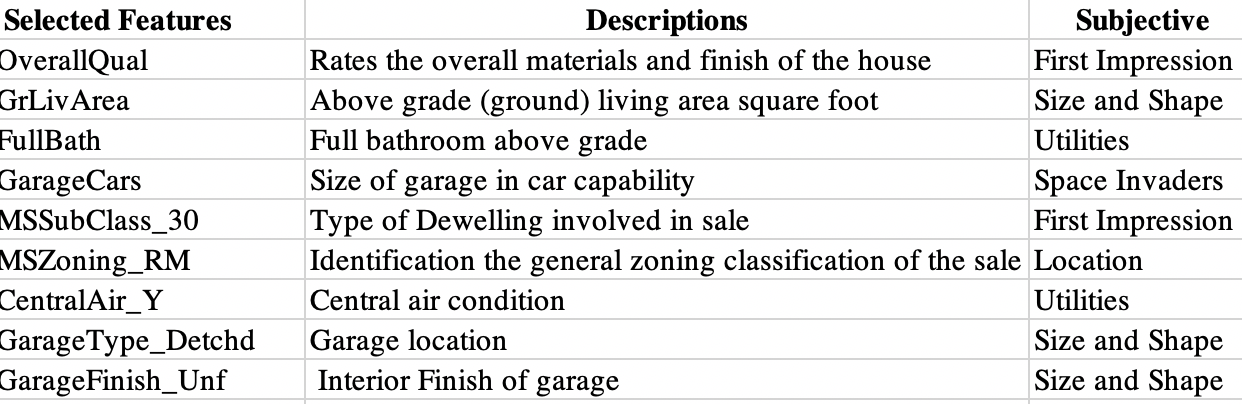

In [7]:
Image(filename='validate.png')

Garage and house price:

https://realtytimes.com/advicefromtheexpert/item/1001125-does-adding-a-garage-to-a-house-increase-home-value?rtmpage=sarahsmith

https://www.realtrends.com/blog/garages-add-12-to-value-of-home-on-average-says-redfin-analysis/